# 01. 직접 W B 구하기(직접 미분: 접선의 기울기)

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD # Gradient 구현한 클래스

In [3]:
def cost(x, y, w):
    n = len(x) # 3
    hx = w * x
    c = np.sum( (hx-y)**2 ) / n
    return c

In [4]:
def gradient(x, y, w): # 미분: 기울기
    n = len(x) # 3
    g = np.sum( (w * x - y) * 2 * x) / n
    return g

In [5]:
w = 5
epochs = 500 # 반복
learning_rate = 0.1 # 임의의 기울기
x = np.array([1,2,3])
y = np.array([1,2,3])

for i in range(epochs):
    c = cost(x, y, w)
    w = w - learning_rate * gradient(x, y, w)
print('최종 w: ',w)

최종 w:  1.0


#### w b 구현

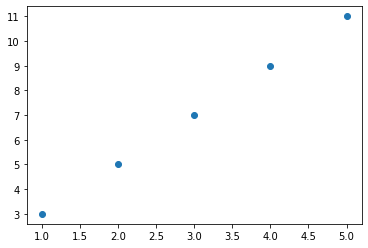

In [6]:
x = np.array([1,2,3,4, 5])
y = np.array([3,5,7,9,11])
plt.scatter(x,y) # 산점도 그리기

In [9]:
# 미분
w = 10
b = 10
epochs = 2000 # 몇 번 트레이닝 할 것인지
learning_rate = 0.01
n = len(x)

for i in range(epochs):
    hy = w * x + b # 예측
    cost = np.sum( (hy-y)**2 ) / n
    gradientW = np.sum( (w*x + b - y) * 2 * x) / n # W 미분
    gradientB = np.sum( (w*x + b - y) * 2 * 1) / n # B 미분
    w = w - learning_rate * gradientW # 최적의 W
    b = b - learning_rate * gradientB # 최적의 B
    # print('cost:',cost, ' w:',w,' b:',b)

print("최종W:", w, " 최종B:", b)

최종W: 1.9980038007632057  최종B: 1.007206912635415


# 02. 텐서플를 이용한 W B 구하기(직접 미분: 접선의 기울기)

In [12]:
x_data = np.array([1,2,3,4, 5])
y_data = np.array([3,5,7,9,11])

# 2개의 벡터 노드를 만든다. => 텐서는 그래프 연산을 하기 때문에 반드시 노드를 만들어야 한다.
x = tf.constant( x_data, dtype=tf.float32 ) # constant 는 고정 값이다.
y = tf.constant( y_data, dtype=tf.float32 ) # 임의의 값을 준다. => constant를 사용할 경우에는 반드시 지정해야 한다.

In [16]:
w = tf.Variable( 10.0 ) # w = w - 0.01 * w 에 대한 미분값{ 실제로는 w.assign_sub(0.01*미분값) }
b = tf.Variable( 10.0 ) # b = b - 0.01 * b 에 대한 미분값{ 실제로는 b.assign_sub(0.01*미분값) }

In [22]:
def compute_cost(): # Mean Square Error
    hx = w * x + b
    cost = tf.reduce_mean( (hx-y)**2 )
    return cost

optimizer = SGD(learning_rate=0.01) # 미분 + 알파가 구현되어 있다.
for i in range(2000): # 2000 번 학습
    optimizer.minimize(compute_cost, var_list = [w,b] )
    cost = compute_cost().numpy()
    # print(i, ") Cost: ", compute_cost().numpy() )
print("최종W:", w.numpy(), " 최종B:", b.numpy())

최종W: 1.999994  최종B: 1.0000207
